# Assignment 1
## Gavrilov Mikhail
## 01.04.2019

### Part 1: Total Solar Irradiance

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import convertdate

In [2]:
sigma = 5.67*(10**(-8))
T = 5800
nts = sigma * (T**4)
nte = nts * (695510000**2) / (149597870700 **2)

<b>Calculate the Total Solar Irradiance (TSI):</b>

$Flux_{sun} = \frac {\sigma T^4 A_{Sun}} {A_{Sun}} = \sigma T^4$ <br>
$Flux_{earth} = \frac {\sigma T^4 A_{Sun}} {4 \pi r_{AU}^2} = \frac{\sigma T^4 r_{sun}^2}{r_{AU}^2}$


In [3]:
print 'Power flux near the Sun = %.2f[W]'% nts
print 'Power flux near the Earth = %.2f[W]'%nte

Power flux near the Sun = 64164532.32[W]
Power flux near the Earth = 1386.92[W]


### Part 2: work with dataset

<b> Read dataset:

In [4]:
data = np.array(pd.read_csv('./international_sunspot_number.csv'))

In [5]:
parsedData1 = []
for i in data:
    tmp = datetime(int(i[0]), int(i[1]), int(i[2]))
    parsedData1.append([tmp, i[3]])
parsedData1 = np.array(parsedData1)

In [6]:
data = np.array(pd.read_csv('./sorce_tsi_24hr_l3.csv'))

In [7]:
parsedData2 = []
for i in data:
    if i[1] != 0:
        y, m, d = convertdate.gregorian.from_jd(i[0])
        tmp = datetime(y, m, d)
        parsedData2.append([tmp, i[1]])
parsedData2 = np.array(parsedData2)

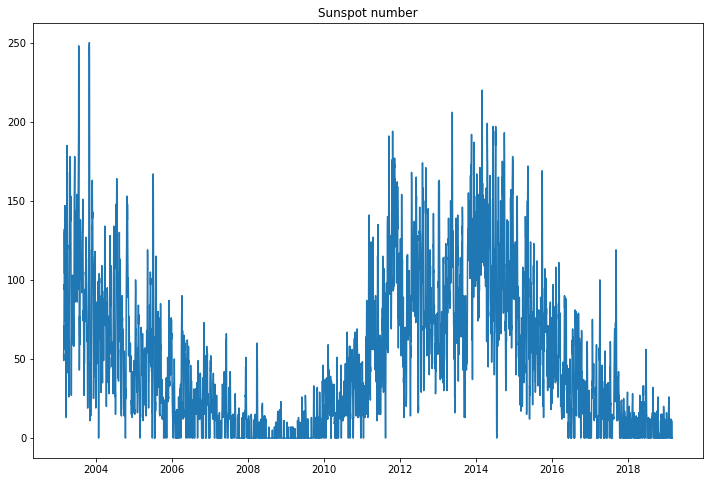

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(parsedData1[:,0], parsedData1[:,1])
plt.title('Sunspot number')
plt.show()

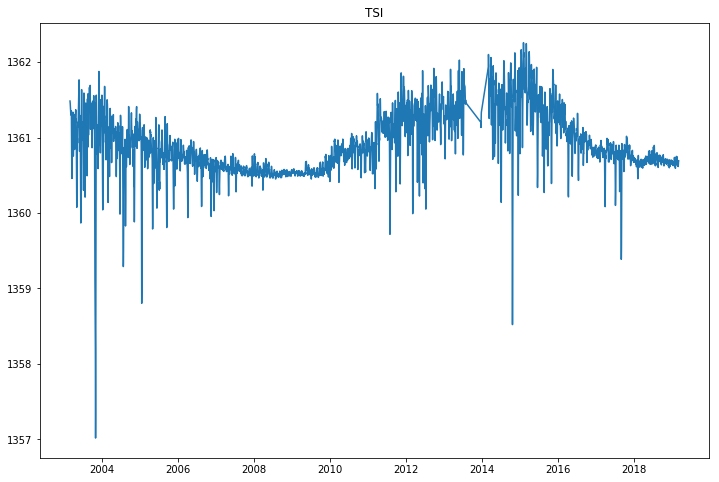

In [9]:
plt.figure(figsize=(12, 8))
plt.title('TSI')
plt.plot(parsedData2[:,0], parsedData2[:,1])
plt.show()

<b> Compare values by displaying them on a single graph (functions were scaled for a clearer display of correlation): </b>

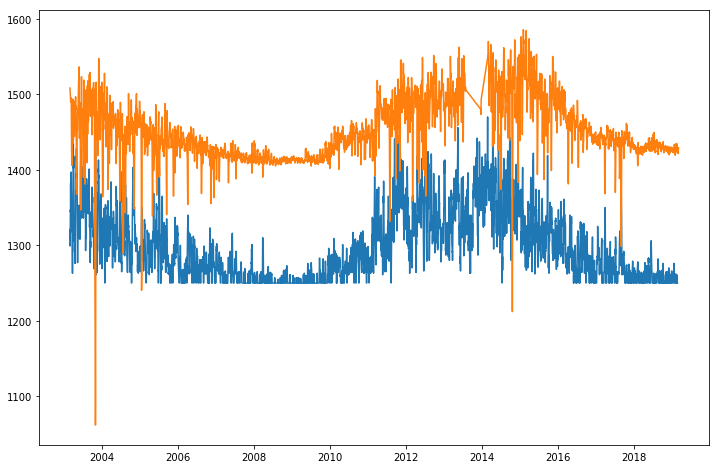

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(parsedData1[:,0], parsedData1[:,1] + 1250)
plt.plot(parsedData2[:,0], (parsedData2[:,1]-1360) * 100 + 1360)
plt.show()

<b>Comparing the graphs, we see a correlation between the number of sunspots and the TSI level. The more spots in the sun, the more TSI. The data presented is noisy, so in order to make them more revealing, we will smooth them by calculating the average monthly value.</b>

In [11]:
monthData1 = []
y = 2003
m = 2
tmp = []
for i in parsedData1:
    if i[0].month == m:
        tmp.append(i[1])
        continue
    monthData1.append([datetime(y, m, 1), np.average(tmp)])
    tmp = [i[1]]
    m = m+1
    if m == 13:
        m = 1
        y = y+1
monthData1 = np.array(monthData1)

In [12]:
monthData2 = []
y = 2003
m = 2
tmp = []
for i in parsedData2:
    if i[0].month == m:
        tmp.append(i[1])
        continue
    monthData2.append([datetime(y, m, 1), np.average(tmp)])
    tmp = [i[1]]
    m = m+1
    if m == 13:
        m = 1
        y = y+1
monthData2 = np.array(monthData2)

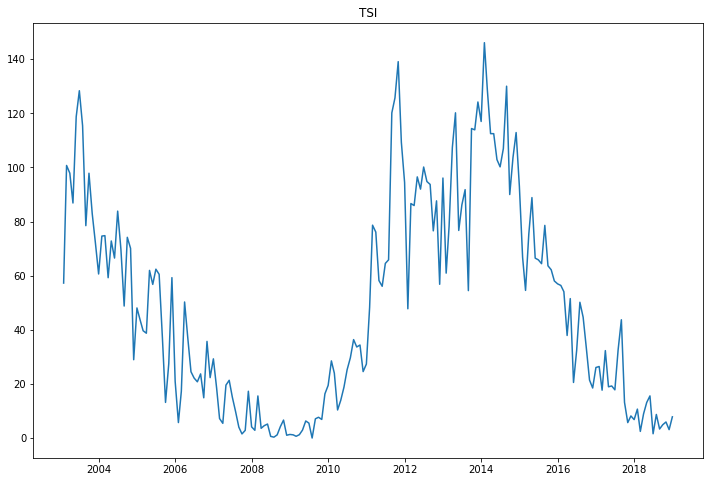

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(monthData1[:,0], monthData1[:,1])
plt.title('TSI')
plt.show()

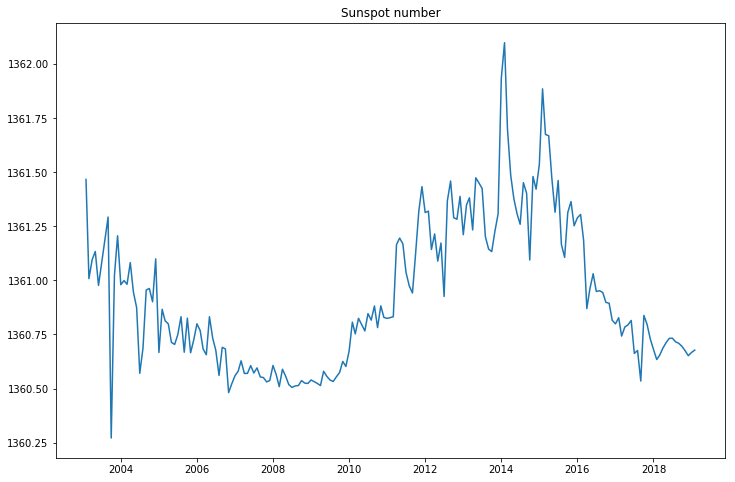

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(monthData2[:,0], monthData2[:,1])
plt.title('Sunspot number')
plt.show()

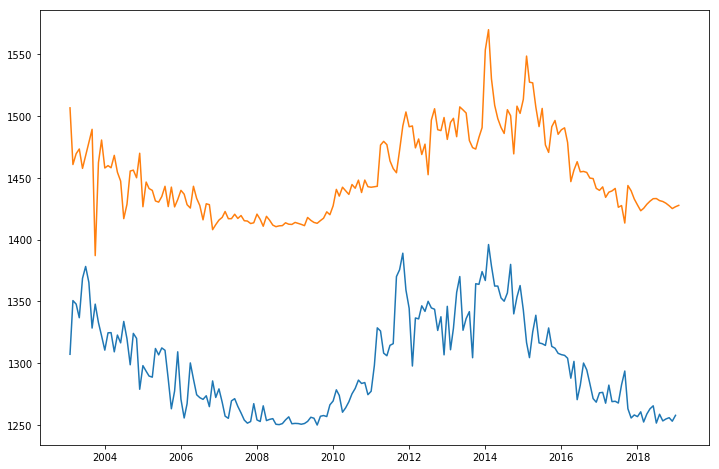

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(monthData1[:,0], monthData1[:,1] + 1250)
plt.plot(monthData2[:,0], (monthData2[:,1]-1360) * 100 + 1360)
plt.show()

<b>On this graph, the dependence found is much more pronounced.</b>

## Discussion:

<b> -Which is the difference between the plot obtained from step 5 and the plot obtained in the step4? <br>
-The graph from the fifth step is smoothed, in fact, the movmean filter, so that the correlation of functions has become even more revealing.

<b> -What is the relationship between sunspot numbers and TSI? <br>
    -The graphs show almost identical behavior. The more spots in the sun, the more TSI

<b> -How the Sun’s dynamics can influence the TSI variations along of the solar cycle?<br>
    -The maximum value of both functions is reached in 2003 and 2014, with an interval of 11 years, which makes it possible to judge the direct correlation of these functions with the solar cycle.

<b> -Why accurate measurements of the Sun’s total irradiance are obtained from the space? Explain. <br>
    -The atmosphere and the magnetic field of the earth do not allow the Sun’s irradiance to reach the surface of the earth, and therefore there is a need to measure it in space.

<b> -Why the radiometers suffer degradation in space environment?<br>
    -In space, radiometers, like everything else, suffer from radiation. The amazing fact is that at the moment TSI increases, the overall level of radiation inside the solar system falls, due to the fact that solar activity begins to protect us from external cosmic radiation.<br>
    Cosmic radiation consists of 90% protons, 7% of helium nuclei (alpha particles), ~ 1% heavier atoms and ~ 1% electrons. Well, the stars (including the sun) abundantly illuminate everything not only with visible light, but also with X-ray and gamma radiation. There are no neutrons in cosmic radiation for an obvious reason - free neutrons have a half-life of 611 seconds and turn into protons. Even a neutron from the sun can not fly, except with absolutely relativistic speed. A small amount of neutrons arrives from the earth, but these are trifles.